# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [12]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [13]:
train, test = keras.datasets.cifar10.load_data()

In [14]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [15]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [16]:
def build_mlp(input_shape, num_class=10):
    """
    Build your own model
    """
    input_layer = keras.models.Input(input_shape)
    x = keras.layers.Dense(units=512, activation='relu')(input_layer)
    x = keras.layers.Dense(units=256, activation='relu')(x)
    x = keras.layers.Dense(units=128, activation='relu')(x)
    out = keras.layers.Dense(units=num_class, activation='softmax')(x)
    model = keras.models.Model(input=[input_layer], output=[out])
    return model

In [17]:
## 超參數設定
"""
Set your required experiment parameters
"""
lr = 0.01
BATCH_SIZE = 32
EPOCH = 10
MOMENTUM = 0.98

In [21]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
opt_adam = keras.optimizers.Adam(learning_rate=lr)
opt_sgd = keras.optimizers.SGD(learning_rate=lr, momentum=MOMENTUM)
opt_rmsprop = keras.optimizers.RMSprop(learning_rate=lr)
opt_adagrad = keras.optimizers.Adagrad(learning_rate=lr)
optimizer = [opt_adam, opt_sgd, opt_rmsprop, opt_adagrad]

for opt in optimizer:
    model = build_mlp(x_train.shape[1:])
    
    
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    model.fit(x_train, y_train, epochs=EPOCH, batch_size=BATCH_SIZE, validation_data=(x_test, y_test), shuffle=True)

    opt_name = 'opt_name_%s' % opt
    results[opt_name] = {'train_loss': model.history.history['loss'],
                         'val_loss': model.history.history['val_loss'],
                         'train_acc': model.history.history['accuracy'],
                         'val_acc': model.history.history['val_accuracy']}

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=[<tf.Tenso...)`
  # Remove the CWD from sys.path while we load stuff.


Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 39s 780us/step - loss: 2.1547 - accuracy: 0.2235 - val_loss: 1.9635 - val_accuracy: 0.2547
Epoch 2/10
50000/50000 [==============================] - 37s 743us/step - loss: 1.9749 - accuracy: 0.2381 - val_loss: 1.9578 - val_accuracy: 0.2357
Epoch 3/10
50000/50000 [==============================] - 37s 747us/step - loss: 1.9589 - accuracy: 0.2441 - val_loss: 2.0406 - val_accuracy: 0.2260
Epoch 4/10
50000/50000 [==============================] - 38s 765us/step - loss: 1.9538 - accuracy: 0.2435 - val_loss: 1.9168 - val_accuracy: 0.2660
Epoch 5/10
50000/50000 [==============================] - 38s 765us/step - loss: 1.9480 - accuracy: 0.2504 - val_loss: 1.9334 - val_accuracy: 0.2508
Epoch 6/10
50000/50000 [==============================] - 38s 759us/step - loss: 1.9566 - accuracy: 0.2438 - val_loss: 1.9291 - val_accuracy: 0.2508
Epoch 7/10
50000/50000 [==============================] 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=[<tf.Tenso...)`
  # Remove the CWD from sys.path while we load stuff.


Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 18s 365us/step - loss: 2.0986 - accuracy: 0.1960 - val_loss: 2.1171 - val_accuracy: 0.1950
Epoch 2/10
50000/50000 [==============================] - 18s 364us/step - loss: 2.0994 - accuracy: 0.1860 - val_loss: 2.0987 - val_accuracy: 0.1921
Epoch 3/10
50000/50000 [==============================] - 18s 360us/step - loss: 2.2255 - accuracy: 0.1332 - val_loss: 2.1525 - val_accuracy: 0.1572
Epoch 4/10
50000/50000 [==============================] - 18s 359us/step - loss: 2.1725 - accuracy: 0.1584 - val_loss: 2.1399 - val_accuracy: 0.1835
Epoch 5/10
50000/50000 [==============================] - 18s 359us/step - loss: 2.1416 - accuracy: 0.1655 - val_loss: 2.1998 - val_accuracy: 0.1630
Epoch 6/10
50000/50000 [==============================] - 18s 356us/step - loss: 2.1683 - accuracy: 0.1607 - val_loss: 2.1715 - val_accuracy: 0.1455
Epoch 7/10
50000/50000 [==============================] 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=[<tf.Tenso...)`
  # Remove the CWD from sys.path while we load stuff.


Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 31s 616us/step - loss: 3.0144 - accuracy: 0.1176 - val_loss: 3.4137 - val_accuracy: 0.1141
Epoch 2/10
50000/50000 [==============================] - 30s 604us/step - loss: 2.1280 - accuracy: 0.1821 - val_loss: 2.1694 - val_accuracy: 0.1806
Epoch 3/10
50000/50000 [==============================] - 29s 579us/step - loss: 2.0787 - accuracy: 0.1978 - val_loss: 2.0486 - val_accuracy: 0.2169
Epoch 4/10
50000/50000 [==============================] - 29s 570us/step - loss: 2.0723 - accuracy: 0.1990 - val_loss: 2.0674 - val_accuracy: 0.2023
Epoch 5/10
50000/50000 [==============================] - 29s 576us/step - loss: 2.0689 - accuracy: 0.2026 - val_loss: 2.1126 - val_accuracy: 0.1847
Epoch 6/10
50000/50000 [==============================] - 29s 572us/step - loss: 2.0657 - accuracy: 0.1999 - val_loss: 2.0184 - val_accuracy: 0.2164
Epoch 7/10
50000/50000 [==============================] 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=[<tf.Tenso...)`
  # Remove the CWD from sys.path while we load stuff.


Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 25s 502us/step - loss: 2.0058 - accuracy: 0.3187 - val_loss: 1.6997 - val_accuracy: 0.3870
Epoch 2/10
50000/50000 [==============================] - 25s 496us/step - loss: 1.6651 - accuracy: 0.4039 - val_loss: 1.6539 - val_accuracy: 0.4160
Epoch 3/10
50000/50000 [==============================] - 25s 496us/step - loss: 1.5804 - accuracy: 0.4393 - val_loss: 1.5930 - val_accuracy: 0.4382
Epoch 4/10
50000/50000 [==============================] - 25s 497us/step - loss: 1.5272 - accuracy: 0.4573 - val_loss: 1.5226 - val_accuracy: 0.4551
Epoch 5/10
50000/50000 [==============================] - 25s 502us/step - loss: 1.4865 - accuracy: 0.4743 - val_loss: 1.4867 - val_accuracy: 0.4746
Epoch 6/10
50000/50000 [==============================] - 25s 499us/step - loss: 1.4537 - accuracy: 0.4845 - val_loss: 1.4856 - val_accuracy: 0.4733
Epoch 7/10
50000/50000 [==============================] 

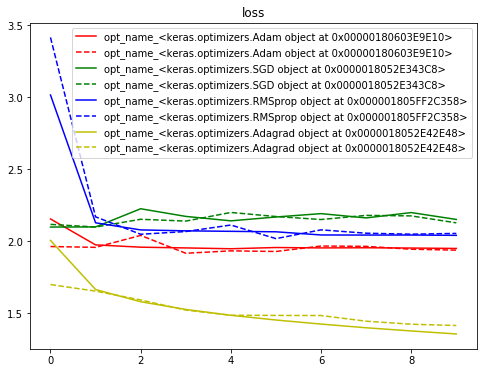

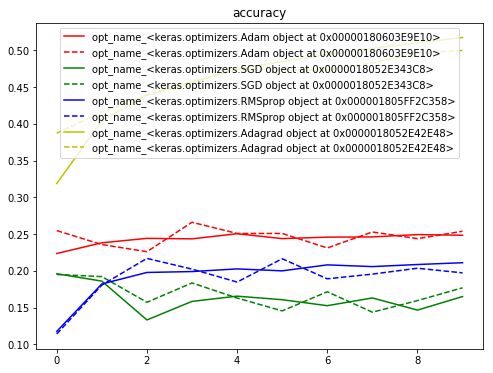

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

color_line = ['r', 'g', 'b', 'y', 'm', 'k']
"""
將實驗結果繪出
"""
plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train_loss'])), results[cond]['train_loss'], '-', label=cond, color=color_line[i])
    plt.plot(range(len(results[cond]['val_loss'])), results[cond]['val_loss'], '--', label=cond, color=color_line[i])

plt.title('loss')
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train_acc'])), results[cond]['train_acc'], '-', label=cond, color=color_line[i])
    plt.plot(range(len(results[cond]['val_acc'])), results[cond]['val_acc'], '--', label=cond, color=color_line[i])

plt.title('accuracy')
plt.legend()
plt.show()